In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import *

In [2]:
data_set = pd.read_csv('/home/mytrah-pc/Mytrah_Adithya/data_turbine/ScatterData_Mokal_MK014.csv')

In [3]:
required_data = data_set[['ActivePower', 'WindSpeed', 'Timestamp']].copy()
required_data = required_data[required_data['ActivePower'] > 0]

In [4]:
max_wind_speed = required_data['WindSpeed'].max()
min_wind_speed = required_data['WindSpeed'].min()
max_active_power = required_data['ActivePower'].max()
min_active_power = required_data['ActivePower'].min()
normalization_factor_wind_speed = max_wind_speed - min_wind_speed
normalization_factor_active_power = max_active_power - min_active_power
scale_factor_wind_speed = 4.0/3
scale_factor_active_power = 1

In [5]:
required_data['ScaledWindSpeed'] = ((required_data['WindSpeed'] - min_wind_speed) * scale_factor_wind_speed) \
                                    / normalization_factor_wind_speed
required_data['ScaledActivePower'] = ((required_data['ActivePower'] - min_active_power) * scale_factor_active_power) \
                                    / normalization_factor_active_power

In [6]:
required_data['cluster_number'] = -2

In [7]:
clustering_algorithm = DBSCAN(
    eps=0.3/20,
    min_samples=15
)

In [8]:
required_data['cluster_number'] = clustering_algorithm.fit_predict(required_data[['ScaledWindSpeed', 'ScaledActivePower']])

In [9]:
import random
r = lambda: random.randint(0,255)
random_color = lambda: '#%02X%02X%02X' % (r(),r(),r())

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

In [11]:
max_elements_cluster = -2
max_elements = 0
for group in required_data.groupby('cluster_number'):
    if(group[1].shape[0] > max_elements):
        max_elements = group[1].shape[0]
        max_elements_cluster = group[0]
    plt.scatter(
        group[1]['ScaledWindSpeed'],
        group[1]['ScaledActivePower'],
        c=random_color(),
        s=np.pi*(2**2)
    )

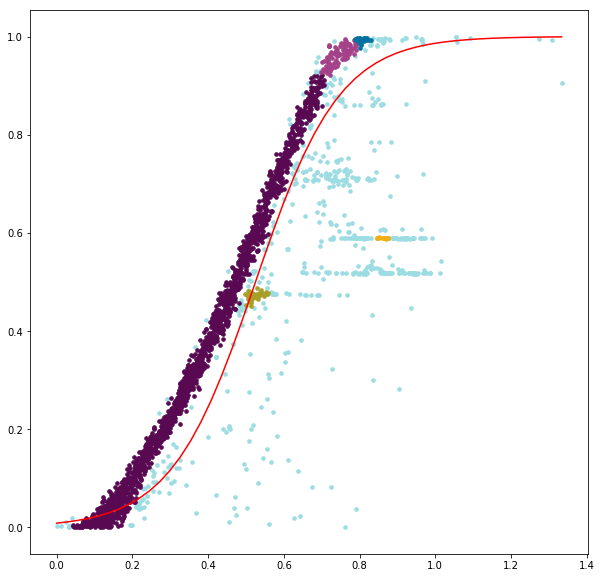

6.03983931443
7.27147222201
25.9436160134
0.09643917799
5.19353610516
2.11890986427
5.38871469518
40.8270123839
5.04032894686
12.607544836
3.68489232528
2.89879549265
4.49169024996
9.71085955217
2.09439265265
5.27233307948
4.51789259553
3.41373854657
4.95933348931
3.63357825357
11.5248271308
8.42473505516
2.0725295604
2.71241448243
22.0275458145
14.0332419306
27.8989048442
10.1236251667
17.9229164533
7.24097783089
11.0509067685
25.440335838
40.2694443369
26.1122089547
35.9318622165
5.95613365506
7.55903512078
35.2409952395
21.9943239641
7.99631932815
22.2618737298
20.4757449302
24.2532351479
22.1534597992
9.17903338025
3.96273289005
18.9548891966
4.57017892122
12.7800543507
4.89188810666
13.8315937899
6.13035014411
26.7346889123
14.234253905
48.3437069911
22.9137809265
18.6765744254
35.7821645624
17.6499607081
23.3384737289
56.7110338787
47.0498754724
53.54632489
13.4843664541
18.3963388499
31.8044311515
16.5118025092
35.2869501054
18.3148384414
38.4315745135
15.3065142761
32.590866422

726.670225321
826.61160277
827.638857117
840.103058268
792.88181193
841.603711344
770.437564697
768.856665395
800.65961853
826.451994731
890.645045115
818.631051992
802.620651398
801.608929698
803.711647085
837.571783269
813.363911235
748.930961965
809.953895874
835.000271149
773.020793101
833.784123128
868.90292806
843.363733622
783.606646423
892.699101969
899.788604736
845.418549093
822.06470932
907.749400533
879.511024475
810.623799286
876.08189738
842.05664683
902.01770874
914.446032715
826.957142436
805.065447693
927.900852458
830.821598882
931.258416138
867.946288961
860.609701742
799.571541901
875.891365814
838.543716532
859.896317855
905.727616882
916.146297201
831.512500407
910.392815145
920.237672119
870.728891398
870.258316549
891.775281601
870.937612712
901.043523661
829.860326487
891.383406474
142.040345132
738.396484375
935.927640788
890.90523997
831.122005208
904.842234599
830.294337985
941.944457703
890.86263148
961.91327301
882.092044067
814.207108256
859.091642965
807

2051.37544698
2085.56919576
1525.89198084
1103.15974345
1590.52943339
2064.30332865
2025.62409851
1505.24974894
1102.77113902
2060.59401632
2064.24694031
1312.59716217
1505.58684957
1999.42385234
2058.63124736
2047.59032837
1542.1674412
2043.11980794
1582.88840332
2063.81629704
2076.01486139
1870.62042867
1594.68139486
2059.47115072
1490.59211039
1503.76759562
2013.50351196
1852.14886475
1010.12366862
1285.64407939
1551.61184367
2050.67964823
1942.78732076
2086.01124837
1927.96950195
2052.59824259
2101.36607524
1598.43673503
1254.61727167
1857.24789327
1506.73211914
1845.84240946
1102.78240295
2030.31470256
2097.41602458
2053.81234985
2094.69960429
1484.68847351
2079.57804728
2072.67707947
2033.07261088
2093.51550964
2068.51354451
1254.69959513
1544.12468099
2040.66145386
1357.18872854
1504.98326579
1994.37402974
1548.25449666
2087.0382487
1828.37564832
2107.77146912
0.00118959587952
2080.30504453
2053.27997561
2118.36818295
2030.37937581
1254.17206177
2056.87968872
2067.20553589
1101.

In [12]:
from scipy.optimize import curve_fit
push_down_value = 0

filter1 = required_data[required_data['cluster_number'] == max_elements_cluster]
filter2 = filter1[(filter1['ScaledActivePower'] > 0.03) & (filter1['ScaledActivePower'] < 0.97)]


def a_sig(x, d, c):
    return 1/(1 + np.exp(-d * x + c))



popt, pcov = curve_fit(a_sig, filter2['ScaledWindSpeed'], filter2['ScaledActivePower'])

x = np.linspace(0, scale_factor_wind_speed)
y = a_sig(x, popt[0] + 1, popt[1] + 1) - push_down_value

plt.plot(x, y, 'r-')


plt.show()

for group in required_data.groupby('WindSpeed'):
    print group[1]['ActivePower'].mean()